In [441]:
import pandas as pd
from pathlib import Path
import statistics
import matplotlib.pyplot as plt
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import timedelta
import plotly.express as px

In [442]:
df=pd.read_csv('C:/Users/euzoe/OneDrive/Desktop/DATA ANALYSIS/MY_PROJECTS/vgsales.csv')

In [443]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [418]:
df.shape

(16598, 11)

In [38]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [535]:
#Clean the data by droping the missing value

df.dropna(subset=['Year', 'Publisher'], axis=0, inplace=True)

In [536]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [534]:
df.Name.unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

In [436]:
df['Name'].str.contains('Wii Sports')

0        True
1        True
2        True
3        True
4        True
         ... 
16593    True
16594    True
16595    True
16596    True
16597    True
Name: Name, Length: 16598, dtype: bool

In [324]:
df.Name.value_counts()

Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: Name, Length: 11493, dtype: int64

In [59]:
#Question 1
#Which region has performed the best in terms of sales?

#sales=df.groupby(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']).agg(sum)
#sales

In [330]:
na=pd.DataFrame(df['NA_Sales']).sum()
eu=pd.DataFrame(df['EU_Sales']).sum()
jp=pd.DataFrame(df['JP_Sales']).sum()
os=pd.DataFrame(df['Other_Sales']).sum()

In [527]:
region_sales=pd.concat([na, eu, jp, os], axis=0)
region_sales

NA_Sales       4327.65
EU_Sales       2406.69
JP_Sales       1284.27
Other_Sales     788.91
dtype: float64

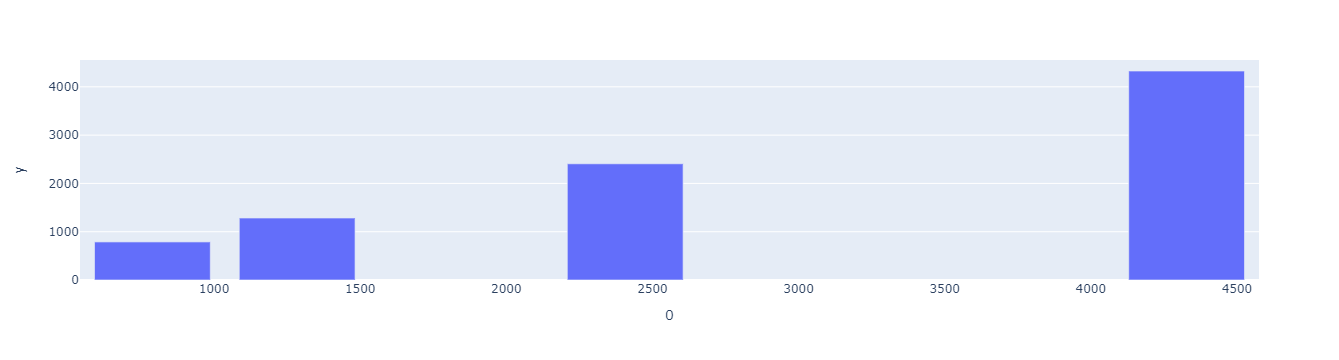

In [528]:
fig=px.bar(region_sales, y=region_sales, x=0)
fig.show()

In [332]:
df['Year'].astype(int)

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16291, dtype: int32

In [ ]:
#Question 2
#The top gaming consoles are Microsoft (Xbox), Sony (Playstation) and Nintendo, with Google acting as a new competitor. 
#Does the dataset also back this information? Analyze w.r.t. different regions and also, globally.




In [401]:
#Question 3
#What are the top 10 games making the most sales globally ?

top=df.loc[df['Year']>2000]

In [412]:
top10=top.groupby(['Name']) [['Global_Sales', 'Year']].sum().sort_values(by=['Global_Sales', 'Year'], ascending=False).reset_index().head(10)

In [413]:
top10

,Name,Global_Sales,Year
0,Wii Sports,82.74,2006.0
1,Grand Theft Auto V,55.92,10069.0
2,Mario Kart Wii,35.82,2008.0
3,Wii Sports Resort,33.00,2009.0
4,Call of Duty: Modern Warfare 3,30.83,8044.0
5,New Super Mario Bros.,30.01,2006.0
6,Call of Duty: Black Ops II,29.72,8048.0
7,Call of Duty: Black Ops,29.40,8040.0
8,Wii Play,29.02,2006.0
9,New Super Mario Bros. Wii,28.62,2009.0


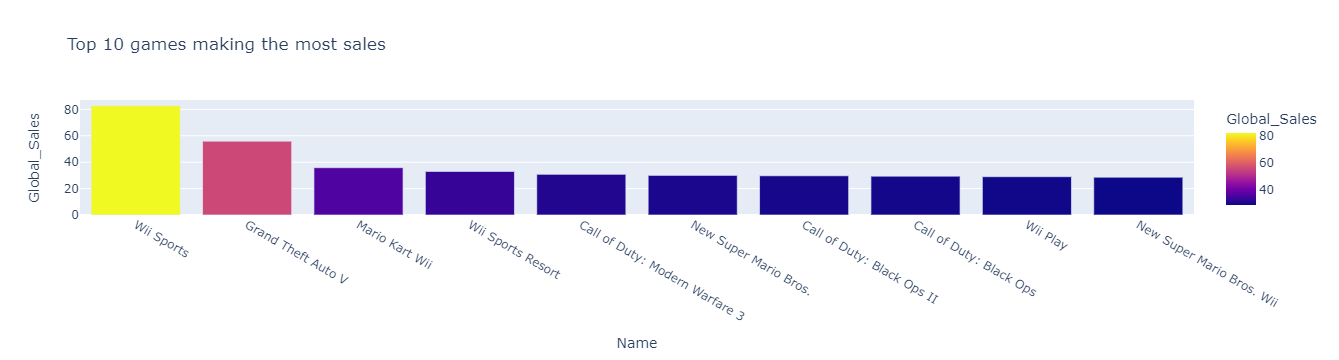

In [630]:
fig=px.bar(top10, x='Name', y='Global_Sales', color='Global_Sales', title='Top 10 games making the most sales')
fig.show()

In [ ]:
rs=df.groupby(['Name'])

In [407]:
rs.get_group('Wii Sports')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [411]:
rw=(df['Name']=='Wii Sports').value_counts()
rw

False    16290
True         1
Name: Name, dtype: int64

In [341]:
df['Year'].max()

2020.0

In [342]:
for i in df['Year']:
    if i>2019:
        print(i)

2020.0


In [468]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [474]:
#Question 4
#Are there any games that have performed well regionally but not globally? What are they?




In [438]:
#Question 5
#Are there any games with release year older than 2000 that are still making high sales? What are they?

older=df.loc[df['Year']>2000]

In [377]:
make_sales=older.groupby(['Name', 'Year']) [['Global_Sales']].max().sort_values(by=['Global_Sales'], ascending=False).reset_index().head(5)

In [378]:
make_sales

,Name,Year,Global_Sales
0,Wii Sports,2006.0,82.74
1,Mario Kart Wii,2008.0,35.82
2,Wii Sports Resort,2009.0,33.00
3,New Super Mario Bros.,2006.0,30.01
4,Wii Play,2006.0,29.02


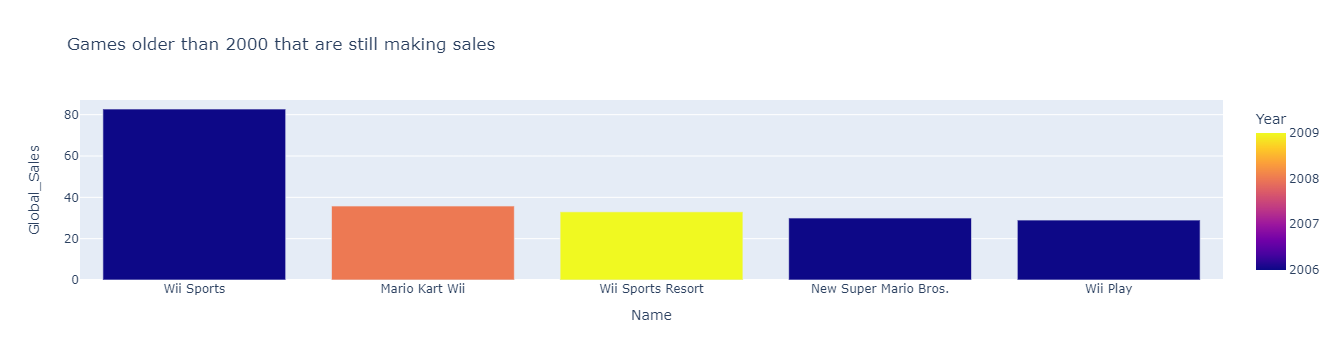

In [687]:
fig=px.bar(make_sales, x='Name', y='Global_Sales', color='Year', title='Games older than 2000 that are still making sales')
fig.show()

In [256]:
na

Year    1980.0
dtype: float64

In [ ]:
#Questions from Jovian

In [506]:
#Question 1
#what is the majority of games whose sales record are present.

maj=df['Genre'].value_counts().head(5)

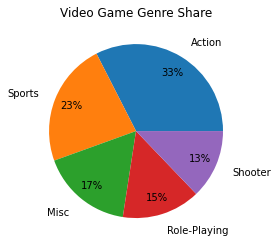

In [730]:
plt.pie(maj, labels=maj.index, autopct='%.0f%%', pctdistance=0.8, labeldistance=1.2)
plt.title('Video Game Genre Share')
plt.ylabel(' ')
plt.show()

In [517]:
#OR

gen=df.groupby(['Genre']).size().sort_values(ascending=[False]).reset_index().head(5)

In [518]:
gen

,Genre,0
0,Action,3316
1,Sports,2346
2,Misc,1739
3,Role-Playing,1488
4,Shooter,1310


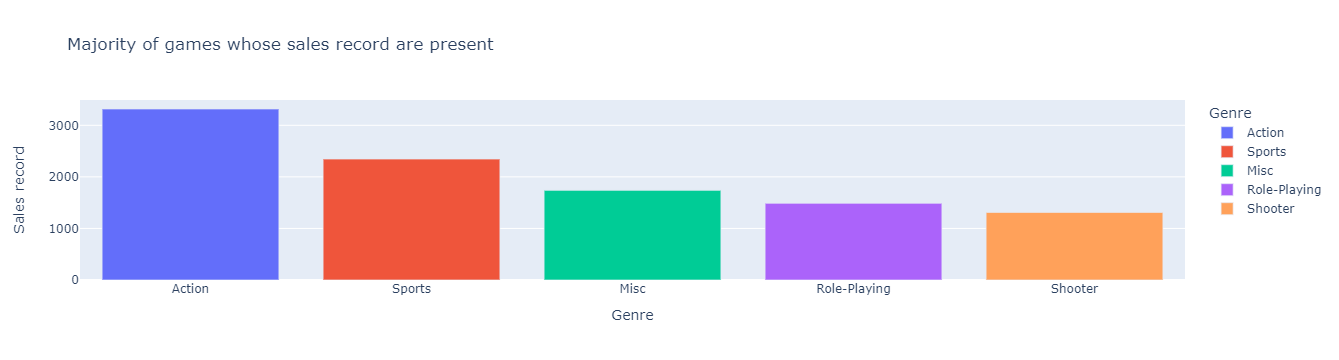

In [624]:
fig=px.bar(gen, y= 0, x= 'Genre', color='Genre', labels={'0':'Sales record'}, title='Majority of games whose sales record are present')
fig.show()

In [670]:
#Question 2
# Analyse the number of games based on the platform.

plat=df.groupby(['Platform']) ['Genre'].size().sort_values(ascending=[False]).reset_index()

In [671]:
plat

,Platform,Genre
0,DS,2131
1,PS2,2127
2,PS3,1304
3,Wii,1290
4,X360,1234
5,PSP,1197
6,PS,1189
7,PC,938
8,XB,803
9,GBA,786


In [672]:
plat.rename(columns={'Genre':'Number of games'}, inplace=True)
plat

,Platform,Number of games
0,DS,2131
1,PS2,2127
2,PS3,1304
3,Wii,1290
4,X360,1234
5,PSP,1197
6,PS,1189
7,PC,938
8,XB,803
9,GBA,786


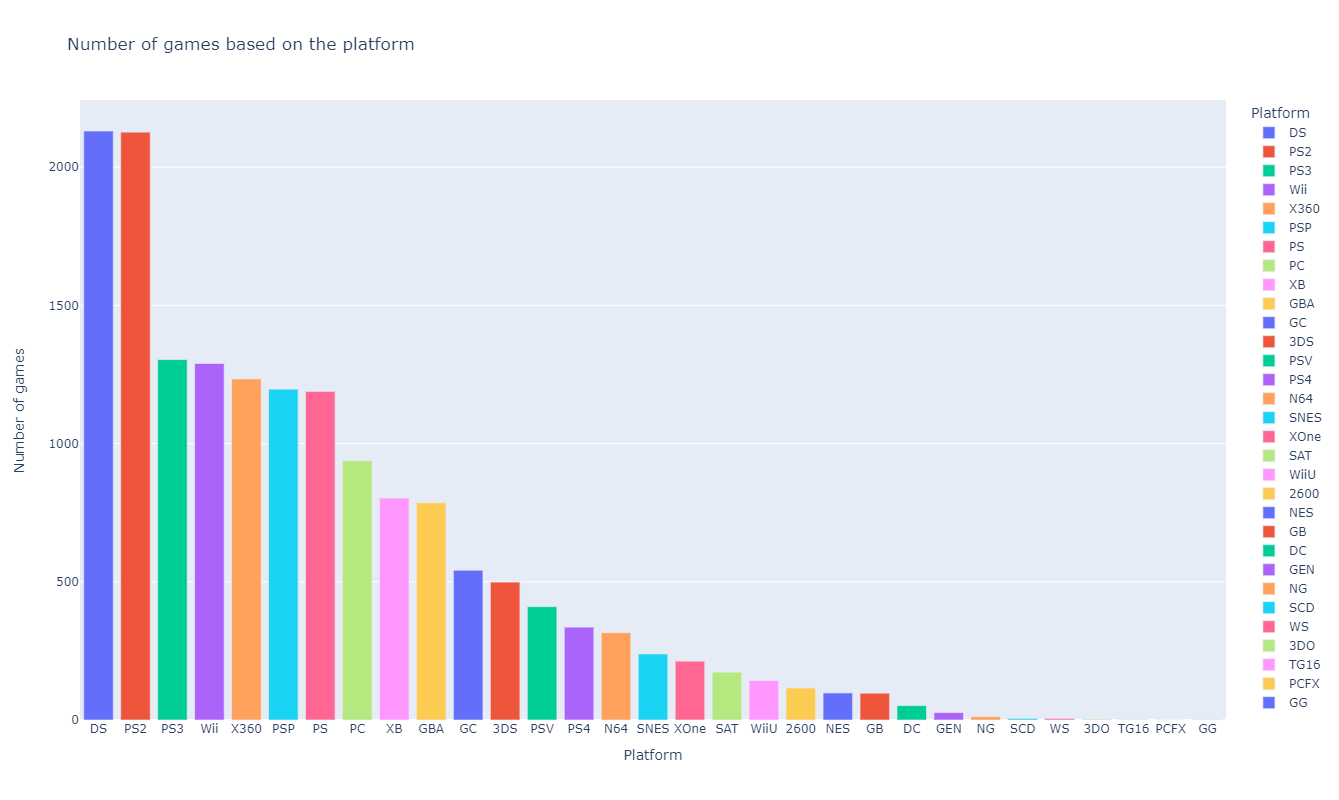

In [680]:
fig=px.bar(plat, y='Number of games', x='Platform', color='Platform', title='Number of games based on the platform', height=800)
fig.show()

In [612]:
#Question 3
# Analyze the Publisher column to see which company publishes what number of games. Let's consider publishers with game counts above 100 only.

pub=df.groupby(['Publisher']) ['Genre'].size().sort_values(ascending=[False]).reset_index().head(29)
pub

,Publisher,Genre
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
5,THQ,712
6,Nintendo,696
7,Sony Computer Entertainment,682
8,Sega,632
9,Take-Two Interactive,412


In [589]:
#OR

s=df.Publisher.value_counts().head(29)

In [590]:
s

Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3Publisher  

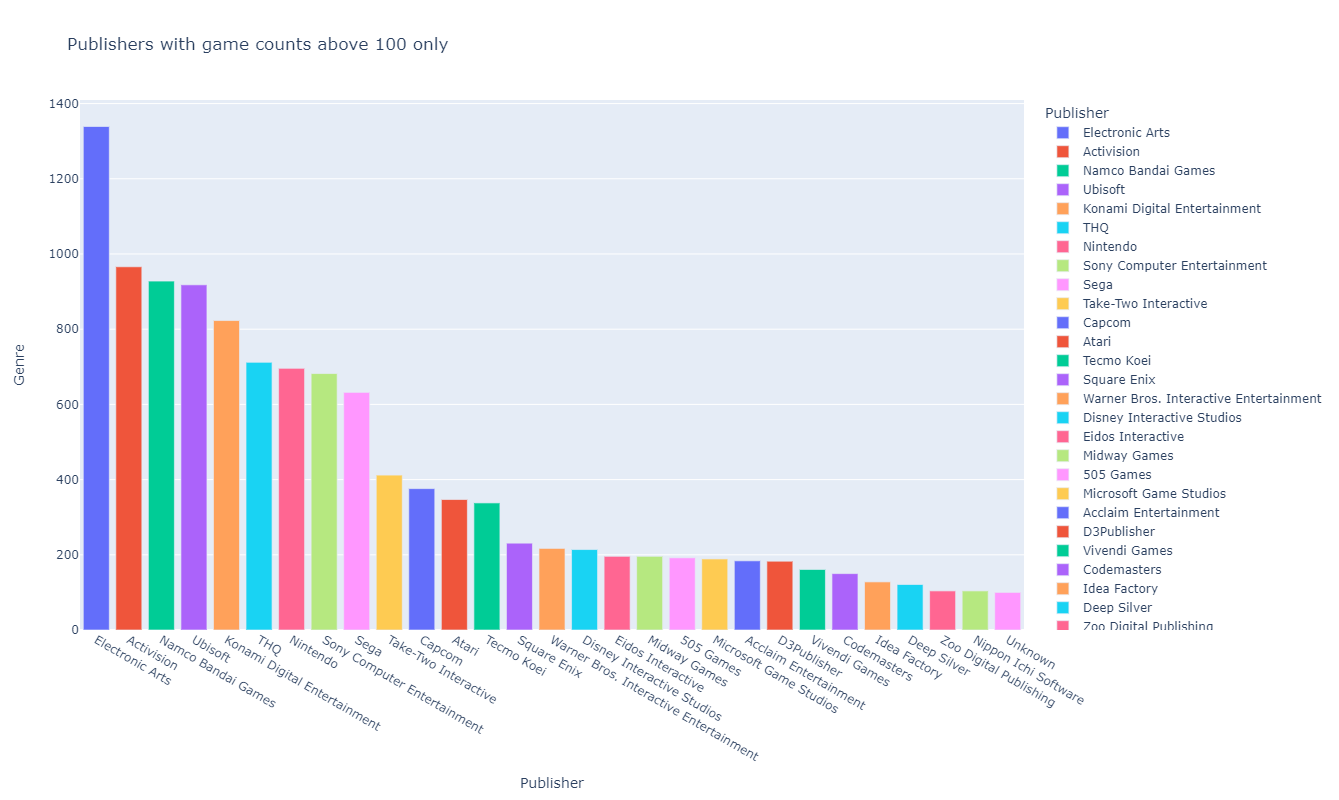

In [596]:
fig=px.bar(pub, y='Genre', x='Publisher', color='Publisher', title='Publishers with game counts above 100 only', width=1000, height=800)
fig.show()

In [628]:
#OR

mo=df.Publisher.value_counts()


In [626]:
game_count=mo[mo.values > 100]
game_count

Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3Publisher  

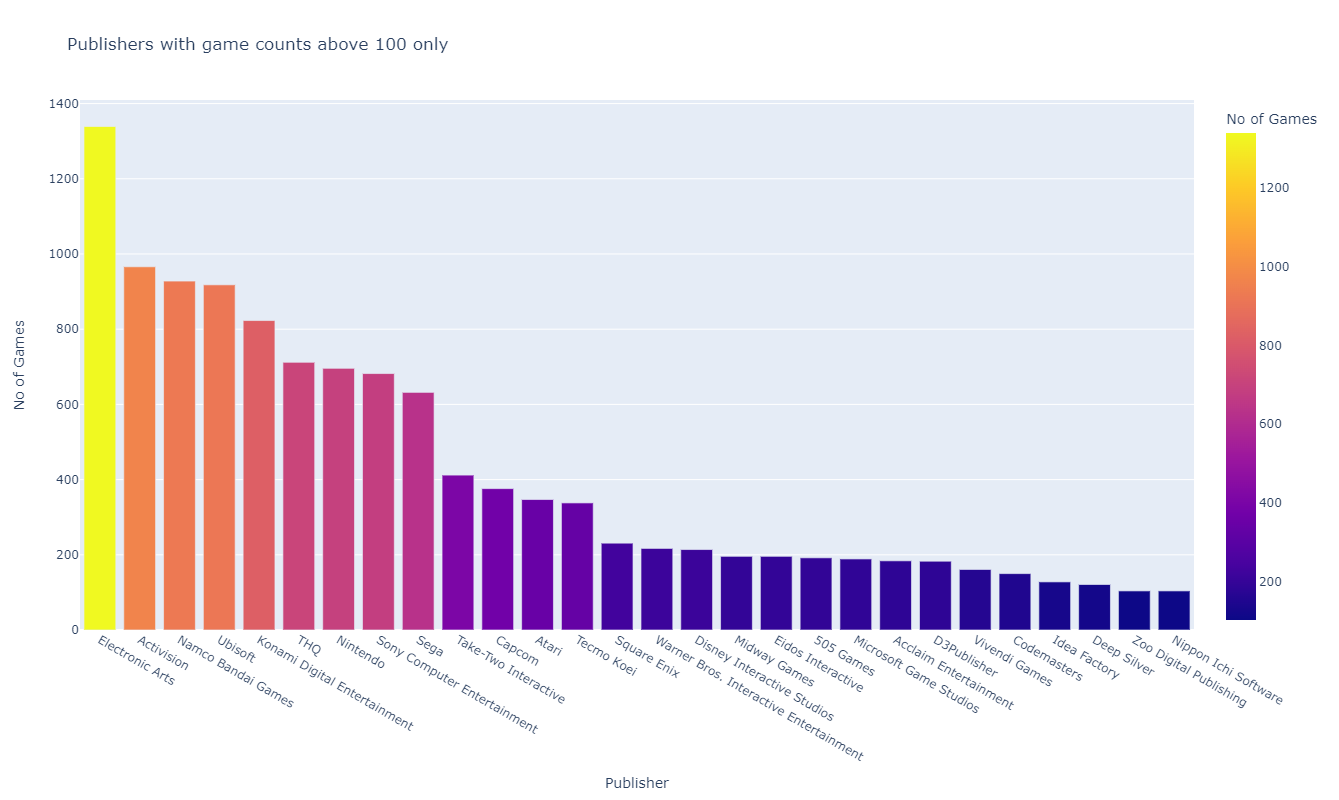

In [629]:
fig=px.bar(game_count, y='Publisher', color='Publisher', title='Publishers with game counts above 100 only', width=1000, height=800 , labels={'index':'Publisher', 'Publisher':'No of Games'})
fig.show()

In [631]:
#Question 4
#Analyse the number of games that had the highest sales.


df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
#Question 5
#analyse the numeric sales column for North America, Europe, Japan, and the Restof the World in various year

In [664]:
na_amer=df.groupby(['Year']) ['NA_Sales'].sum().sort_values(ascending=[False]).reset_index()
na_amer

,Year,NA_Sales
0,2008.0,351.44
1,2009.0,338.85
2,2007.0,311.18
3,2010.0,304.24
4,2006.0,263.12
5,2005.0,241.58
6,2011.0,241.00
7,2004.0,218.80
8,2002.0,216.19
9,2003.0,193.59


In [727]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [728]:
df=df.loc[df['Platform'] == 'DS']

In [729]:
df.shape

(0, 11)